In [32]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt

In [51]:
# generate random walk

x = np.random.randn(1000).cumsum() * 0.3

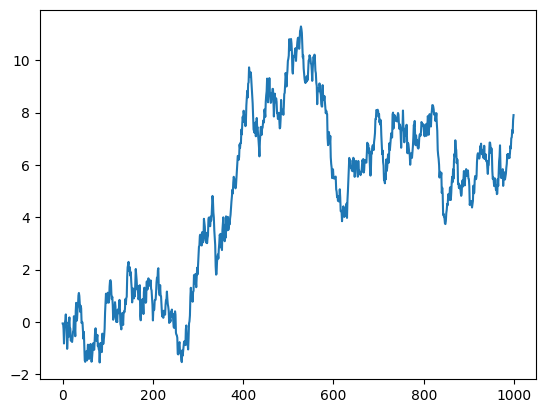

In [52]:
# plot walk
plt.plot(x)
plt.show()

In [53]:
# convert walk into angle

def normalize_angle(x):
    return np.arctan2(np.sin(x), np.cos(x))

x_normalized = normalize_angle(x)

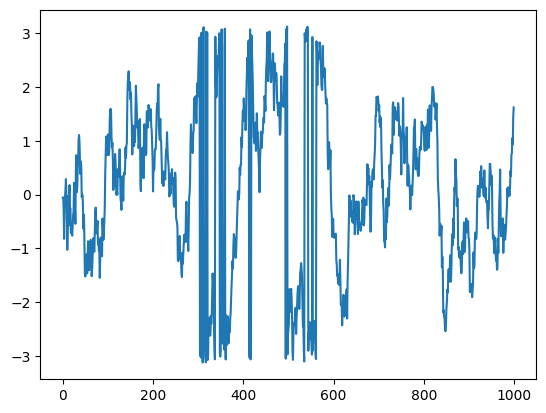

In [54]:
# plot angle
plt.plot(x_normalized)
plt.show()

In [55]:
# naive smoothing
x_smoothed_naive = gaussian_filter1d(x_normalized, sigma=3)


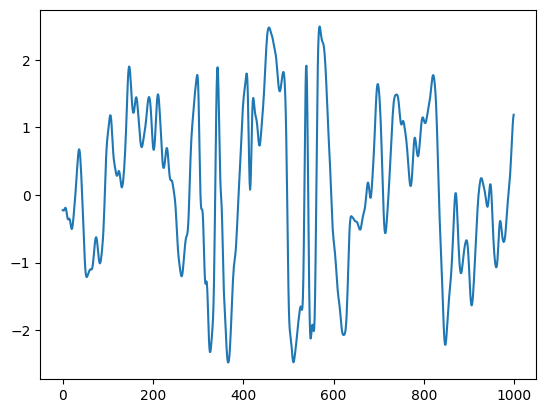

In [56]:
# plot smoothed angle
plt.plot(x_smoothed_naive)
plt.show()

In [57]:
# smoothing before normalization
x_smoothed = normalize_angle(gaussian_filter1d(x, sigma=3))

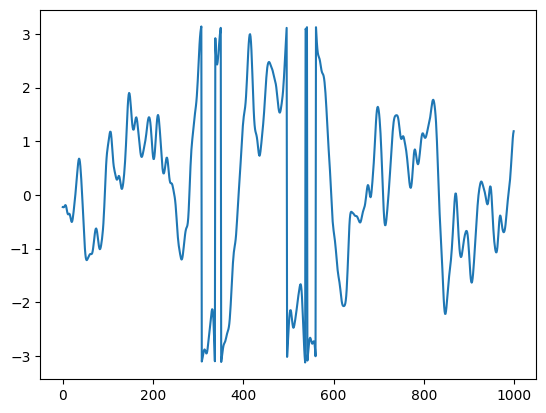

In [58]:
# plot smoothed angle
plt.plot(x_smoothed)
plt.show()

In [64]:
# try to be smart about smoothing
ang_delta = np.diff(x_normalized, prepend=0)
ang_delta_normalized = normalize_angle(ang_delta)
reconstructed_ang = np.cumsum(ang_delta_normalized)

reconstructed_ang_smoothed = gaussian_filter1d(reconstructed_ang, sigma=3)

reconstructed_ang_smoothed_normalized = normalize_angle(reconstructed_ang_smoothed)

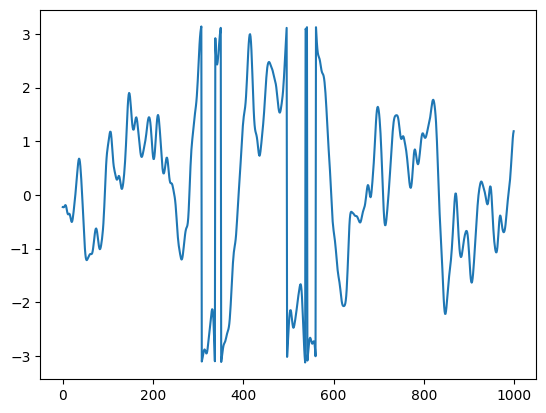

In [65]:
# plot smoothed angle
plt.plot(reconstructed_ang_smoothed_normalized)
plt.show()

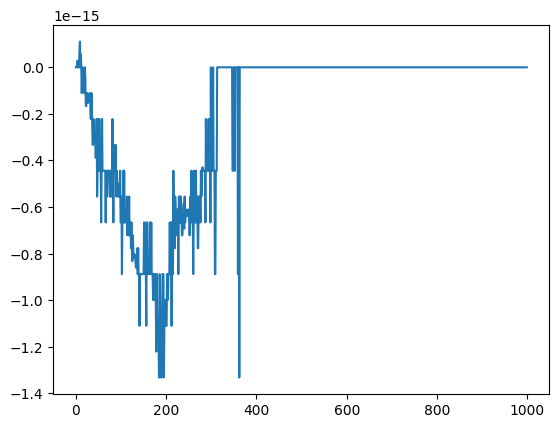

In [66]:
# plot residual: between smart and true smoothed

plt.plot(normalize_angle(reconstructed_ang_smoothed_normalized - x_smoothed))
plt.show()